# SQLAlchemy
Clémence RIBUOT-SOUPISON, Adrien GAILLARD and Alexandre PUCH

## 1. What is SQLAlchemy?
SQLAlchemy is a widely used toolbox for SQL Expression Langage and Object Relational Mapper (ORM) in Python. SQLAlchemy is an open source software created in 2005.

### 1.1. SQL
SQL or Structured Query Language is used to manage relational database, like to add, modify or delete data from a database.

### 1.2. SQLAlchemy Core & ORM
- SQL Expression Language, or Core, is a Pythonic way of representing common SQL statement and is close to the traditional SQL. It has a schema-centric view with a focus on tables, keys and index structures.

- An ORM is programming technique that enables to link object databases (every object is created from a class) to relational databases (data organised in tables). With SQLAlchemy, objects can thus be mapped to the database. It introduces an abstraction layer that allows for more object-oriented code.

- Mixing and matching the uses of the ORM and of the Core can create vey powerful applications.

### 1.3. Choosing between SQLAlchemy Core & ORM
The main factor to consider when choosing between SQLAlchemy Core and the ORM is whether the data is viewed as schema (SQLAlchemy Core) or business objects (ORM).


## 2. Basics on SQL
### 2.1. Definition and systems 

- SQL, which stands for Structured Query Language, is a programming language that is used to communicate with and manipulate databases.
- The SQL programming language was first developed in the 1970s by IBM researchers Raymond Boyce and Donald Chamberlin. 
- Some common relational database management systems that use SQL are: Oracle, MySQL, Microsoft SQL Server, SQLite, etc.

### 2.2. Primary key and foreign key 
- A SQL Primary Key is a field in a table which remarkably distinguishes each line/record in a database table. Primary keys must contain unique values. A primary key segment can’t have NULL qualities.


- A Foreign Key is a segment or a mix of segments whose qualities coordinate a Primary Key in an alternate table.The connection between 2 tables coordinates the Primary Key in one of the tables with a Foreign Key in the second table.



### 2.3 Basic SQL commands

- The SELECT statement is used to select data from a database.

- The INSERT INTO statement is used to insert new records in a table

- The UPDATE statement is used to modify the existing records in a table.

- The DELETE statement is used to delete existing records in a table.

## 3. Getting started with SQLAlchemy
### 3.1. Installing SQLAlchemy and a DBAPI
In the terminal, there are two possible ways to install SQLAlchemy: 

- With the Python Package Manager (pip):

- With the anaconda distribution:

A DBAPI (DataBase API) is also needed as it will link the Python code to the database. Each database system has its own library (sqlite3 for SQLite, mysql.connector for MySQL...).

In [38]:
import sqlite3 as sq3

We chose to use sqlite3 as it is a popular language and it is compatible with a computer app that helps visualise and manage databases: DB Browser for SQLite. It has a familar spreadsheet-like interface and sql commands are not needed.

This app can be downloaded at: https://sqlitebrowser.org/

### 3.2. Creating the Engine
We will build a database called 'tutorial.db' from scratch. First, we have to build the Engine. The Engine is how SQLAlchemy communicates with the database.

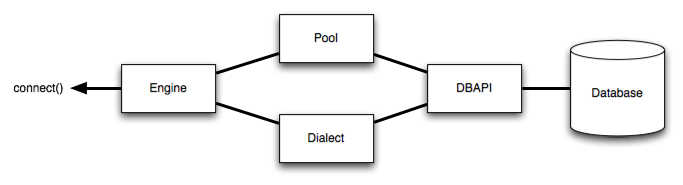

In [65]:
from sqlalchemy import *

engine = create_engine('sqlite:///tutorial2.db', echo=True)

#Arguments: 
# - DB URL: as an absolute path following sqlite:///
# - Echo: if True, the Engine will log all statements to the default log handler.
# Very useful for debugging, but can be modified at any time.

### 3.3. Creating tables
Before creating the definition of the tables in our DB, we need to create the object that will manage them. When defining a table, we give information about the data (name of the columns, types of data ...). This information is the metadata.

In [66]:
metadata = MetaData(bind=engine)

We then create two tables for our database:
- A 'users' with four columns ('id' as primary key, 'name', 'age', 'password') and the type of the data in each column.
- A 'adresses' with three columns ('id' as primary key, 'user_id' as foreign key, 'email_address') and the type of the data in each column.

The foreign key creates a link between the two tables. Here, it says that user_id from addresses is the same as id from users (i.e. users.id).

In [67]:
users_table = Table('users', metadata,
                    Column('id', Integer, primary_key=True),
                    Column('name', String(40)),
                    Column('age', Integer),
                    Column('password', String),
                    )

addresses_table = Table('addresses', metadata,
                        Column('id', Integer, primary_key=True),
                        Column('user_id', None, ForeignKey('users.id')),
                        Column('email_address', String, nullable=False)                            
                        )

Then, we finally create our database with the defined tables by binding our metadate to our database:

In [68]:
metadata.create_all()

2020-11-05 21:42:37,749 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-11-05 21:42:37,751 INFO sqlalchemy.engine.base.Engine ()
2020-11-05 21:42:37,753 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-11-05 21:42:37,754 INFO sqlalchemy.engine.base.Engine ()
2020-11-05 21:42:37,754 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("users")
2020-11-05 21:42:37,755 INFO sqlalchemy.engine.base.Engine ()
2020-11-05 21:42:37,758 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("users")
2020-11-05 21:42:37,759 INFO sqlalchemy.engine.base.Engine ()
2020-11-05 21:42:37,760 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("addresses")
2020-11-05 21:42:37,761 INFO sqlalchemy.engine.base.Engine ()
2020-11-05 21:42:37,762 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("addresses")
2020-11-05 21:42:37,763 INFO sqlalchemy.engine.base.Engine ()
2020-11-05 21:42:3

## 4. Manipulating databases with SQLAlchemy
### 4.1. Adding data

You can add data by rows. There are two different ways to add rows: one-by-one or multiple rows at a time, with or without a database connection.

#### Inserting one row

In [69]:
# create an Insert object
ins = users_table.insert()

# add values to the Insert object
new_user = ins.values(name="Joe", age=20, password="pass")

# create a database connection
conn = engine.connect()

# add user to database by executing SQL
conn.execute(new_user)

2020-11-05 21:42:40,520 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:42:40,522 INFO sqlalchemy.engine.base.Engine ('Joe', 20, 'pass')
2020-11-05 21:42:40,526 INFO sqlalchemy.engine.base.Engine COMMIT


In [70]:
#connectionless inserts

result = engine.execute(ins, name="Juliet", age=15, password="sap_natki")

result = users_table.insert().execute(name="Marta", age=45, password="marathon")

2020-11-05 21:42:45,001 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:42:45,002 INFO sqlalchemy.engine.base.Engine ('Juliet', 15, 'sap_natki')
2020-11-05 21:42:45,005 INFO sqlalchemy.engine.base.Engine COMMIT
2020-11-05 21:42:45,022 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:42:45,024 INFO sqlalchemy.engine.base.Engine ('Marta', 45, 'marathon')
2020-11-05 21:42:45,028 INFO sqlalchemy.engine.base.Engine COMMIT


#### Inserting multiple rows

In [71]:
conn.execute(users_table.insert(), [
    {"name": "Patricia", "age":10, "password":"gouzaille"},
    {"name": "Gontran", "age":25, "password":"urbain"},
    {"name": "Coralie", "age":40, "password":"meilleur"}])

2020-11-05 21:43:11,242 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:43:11,242 INFO sqlalchemy.engine.base.Engine (('Patricia', 10, 'gouzaille'), ('Gontran', 25, 'urbain'), ('Coralie', 40, 'meilleur'))
2020-11-05 21:43:11,250 INFO sqlalchemy.engine.base.Engine COMMIT


### 4.2. Selecting data

The basics of database is to select the different data. SQLAlchemy library is well suited to do so directly from Python. It is quite convenient to use when manipulating and building the database.

In [72]:
from sqlalchemy.sql import select

In [73]:
s = select([users_table])
result = s.execute()

2020-11-05 21:43:18,288 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.age, users.password 
FROM users
2020-11-05 21:43:18,289 INFO sqlalchemy.engine.base.Engine ()


In [74]:
for row in result:
    print(row)

(1, 'Joe', 20, 'pass')
(2, 'Juliet', 15, 'sap_natki')
(3, 'Marta', 45, 'marathon')
(4, 'Patricia', 10, 'gouzaille')
(5, 'Gontran', 25, 'urbain')
(6, 'Coralie', 40, 'meilleur')


In [17]:
result[0]     #error

TypeError: 'ResultProxy' object is not subscriptable

In [18]:
result.password     #error

AttributeError: 'ResultProxy' object has no attribute 'password'

In [75]:
row[0]

6

In [76]:
row.password

'meilleur'

You can also get the rows in a list a tuples instead of Row objects by using the database connection as follows:

In [77]:
conn = engine.connect()
res = conn.execute(s)
rows = res.fetchall()     #get all the rows: list
row = res.fetchone()     #get the first row

2020-11-05 21:43:30,151 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.age, users.password 
FROM users
2020-11-05 21:43:30,153 INFO sqlalchemy.engine.base.Engine ()


In [78]:
type(rows)

list

In [79]:
rows[0][1]

'Joe'

### 4.3. Data mapping
#### One-to-many relationship

The ORM’s “handle” to the database is the `Session`. When we first set up the application we define a Session class which will serve as a factory for new Session objects:

In [80]:
from sqlalchemy.orm import mapper, sessionmaker, clear_mappers

In [81]:
Session = sessionmaker(bind=engine)     #begining of a session (class)
session = Session()     #create a object session we will work on, associated with the engine

In [82]:
class User(object):
    def __init__(self, name=None, age=None, password=None):
        self.name = name
        self.age = age
        self.password = password
    def __repr__(self):
        return self.name
    
class Email(object):
    def __init__(self, address=None):
        self.address = address
    def __repr__(self):
        return self.address

In [83]:
# Create the mappers
emailmapper = mapper(Email, addresses_table)

usermapper = mapper(User, users_table, )

In [84]:
ed_user = User(name='ed', age=28, password='oui-oui')
ed_user.age

28

In [85]:
marta_user = User(name='Marta', age=39, password='5kmapied')
juliet_user = User(name='Juliet', age=17, password='sap_natki')
session.add(ed_user)
session.add(marta_user)
session.add(juliet_user)

In [86]:
# Select the object whose name is "ed"

the_user = session.query(User).filter_by(name='ed').first()

2020-11-05 21:44:23,702 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-11-05 21:44:23,707 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:44:23,708 INFO sqlalchemy.engine.base.Engine ('ed', 28, 'oui-oui')
2020-11-05 21:44:23,712 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:44:23,714 INFO sqlalchemy.engine.base.Engine ('Marta', 39, '5kmapied')
2020-11-05 21:44:23,716 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:44:23,719 INFO sqlalchemy.engine.base.Engine ('Juliet', 17, 'sap_natki')
2020-11-05 21:44:23,720 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.age AS users_age, users.password AS users_password 
FROM users 
WHERE users.name = ?
 LIMIT ? OFFSET ?
2020-11-05 21:44:23,722 INFO sqlalchemy.engine.base.Engine ('ed', 1, 0)


In [87]:
ed_user is the_user     #connection with the object

True

In [88]:
# Multiple additions to the session

session.add_all([
    User(name='Wendy', age=67, password='carotte'),
    User(name='Mary', age=36, password='Yu39_e'),
    User(name='Fred', age=9, password='fred77')])

session.commit()

2020-11-05 21:44:38,200 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:44:38,201 INFO sqlalchemy.engine.base.Engine ('Wendy', 67, 'carotte')
2020-11-05 21:44:38,204 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:44:38,205 INFO sqlalchemy.engine.base.Engine ('Mary', 36, 'Yu39_e')
2020-11-05 21:44:38,206 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, age, password) VALUES (?, ?, ?)
2020-11-05 21:44:38,207 INFO sqlalchemy.engine.base.Engine ('Fred', 9, 'fred77')
2020-11-05 21:44:38,209 INFO sqlalchemy.engine.base.Engine COMMIT


## Sources
- https://www.sqlalchemy.org/
- https://www.tutorialspoint.com/sqlalchemy/sqlalchemy_introduction.htm
- https://www.oreilly.com/library/view/essential-sqlalchemy-2nd/9781491916544/preface02.html#:~:text=Choosing%20Between%20SQLAlchemy%20Core%20and%20ORM&text=The%20two%20modes%20use%20slightly,%2C%20keys%2C%20and%20index%20structures
- http://www.rmunn.com/sqlalchemy-tutorial/tutorial.html 